In [6]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
df = pd.read_excel("merged_9.xlsx", index_col = 0)
df.head()

,Unnamed: 0.1,PropID_prop,Property Address_prop,Property Name_prop,Star Rating_prop,Energy Star_prop,LEED Certified_prop,Building Status_prop,Secondary Type_prop,Market Name_prop,...,Construction Material_prop_Wood Frame,health,utility,entertainment,food,security,Year Last Sale Date,Time Since Last Sale,Years Since Assessment,Years since Built
0,0,P1,6215 Johns Creek Cmn,The Reserve at Johns Creek Walk,4,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,0,1,1,1,1,1,2017.0,2,5.5,13
1,1,P4,250 10th St NE,Post Parkside ATL,4,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,0,1,1,1,1,1,2008.0,11,5.0,35
2,2,P5,100 10th St NW,100 Midtown,3,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,0,0,1,1,1,1,2014.0,5,6.0,51
3,3,P6,150 NE 10th St,Juniper & 10th Highrise,2,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,0,1,1,1,0,0,NaN,3,5.0,35
4,4,P7,48-80 12th St NE,Twelfth Street West Apartments,2,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,0,0,1,0,0,1,2012.0,7,5.0,60


In [3]:
len(df.iloc[:,121:203].index) -  df.iloc[:,121:203].count()

2010 Avg Age(1m)_prop          0
2010 Med Age(1m)_prop          0
2010 Pop Age 0-4(1m)_prop      0
2010 Pop Age 10-14(1m)_prop    0
2010 Pop Age 15-19(1m)_prop    0
                              ..
2024 Pop Age 65+(1m)_prop      0
2024 Pop Age 65-69(1m)_prop    0
2024 Pop Age 70-74(1m)_prop    0
2024 Pop Age 75-79(1m)_prop    0
2024 Pop Age 80-84(1m)_prop    0
Length: 82, dtype: int64

In [9]:
df1 = df
df1['Student'] = (df1['2019 Pop Age <19(1m)_prop'] + df1['2019 Pop Age 20-24(1m)_prop'])*100\
                /(df1['2019 Pop Age <19(1m)_prop'] + df1['2019 Pop Age 20-64(1m)_prop'] + df1['2019 Pop Age 65+(1m)_prop'])
df1['Working'] = (df1['2019 Pop Age 20-64(1m)_prop'] - df1['2019 Pop Age 60-64(1m)_prop'])*100\
                /(df1['2019 Pop Age <19(1m)_prop'] + df1['2019 Pop Age 20-64(1m)_prop'] + df1['2019 Pop Age 65+(1m)_prop'])
df1['Senior'] = (df1['2019 Pop Age 65+(1m)_prop'] + df1['2019 Pop Age 60-64(1m)_prop'])*100\
                /(df1['2019 Pop Age <19(1m)_prop'] + df1['2019 Pop Age 20-64(1m)_prop'] + df1['2019 Pop Age 65+(1m)_prop'])
df1.head()

,Unnamed: 0.1,PropID_prop,Property Address_prop,Property Name_prop,Star Rating_prop,Energy Star_prop,LEED Certified_prop,Building Status_prop,Secondary Type_prop,Market Name_prop,...,entertainment,food,security,Year Last Sale Date,Time Since Last Sale,Years Since Assessment,Years since Built,Student,Working,Senior
0,0,P1,6215 Johns Creek Cmn,The Reserve at Johns Creek Walk,4,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,1,1,1,2017.0,2,5.5,13,37.805622,58.524145,12.762655
1,1,P4,250 10th St NE,Post Parkside ATL,4,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,1,1,1,2008.0,11,5.0,35,27.824543,64.993784,14.199964
2,2,P5,100 10th St NW,100 Midtown,3,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,1,1,1,2014.0,5,6.0,51,32.108135,64.733860,11.030286
3,3,P6,150 NE 10th St,Juniper & 10th Highrise,2,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,1,0,0,NaN,3,5.0,35,28.079384,66.045876,13.518372
4,4,P7,48-80 12th St NE,Twelfth Street West Apartments,2,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,0,0,1,2012.0,7,5.0,60,28.946795,67.215438,12.018462


In [11]:
df['Construction Material_prop'] = df[['Construction Material_prop_Masonry','Construction Material_prop_Metal','Construction Material_prop_Reinforced Concrete','Construction Material_prop_Steel','Construction Material_prop_Wood Frame']].idxmax(axis=1)
df = df.replace({'Construction Material_prop_Masonry': 'Masonry', 'Construction Material_prop_Metal': 'Metal', 'Construction Material_prop_Reinforced Concrete': 'Concrete', 'Construction Material_prop_Steel': 'Steel', 'Construction Material_prop_Wood Frame': 'Wood Frame'})
df.head()

,Unnamed: 0.1,PropID_prop,Property Address_prop,Property Name_prop,Star Rating_prop,Energy Star_prop,LEED Certified_prop,Building Status_prop,Secondary Type_prop,Market Name_prop,...,health,utility,entertainment,food,security,Year Last Sale Date,Time Since Last Sale,Years Since Assessment,Years since Built,Construction Material_prop
0,0,P1,6215 Johns Creek Cmn,The Reserve at Johns Creek Walk,4,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,1,1,1,1,1,2017.0,2,5.5,13,Masonry
1,1,P4,250 10th St NE,Post Parkside ATL,4,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,1,1,1,1,1,2008.0,11,5.0,35,Masonry
2,2,P5,100 10th St NW,100 Midtown,3,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,0,1,1,1,1,2014.0,5,6.0,51,Concrete
3,3,P6,150 NE 10th St,Juniper & 10th Highrise,2,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,1,1,1,0,0,NaN,3,5.0,35,Steel
4,4,P7,48-80 12th St NE,Twelfth Street West Apartments,2,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,0,1,0,0,1,2012.0,7,5.0,60,Masonry


In [49]:
df1['new age'] = df['Years since Built'].apply(lambda x: "New" if x < 25 else "Old")
df1.head()

,Unnamed: 0.1,PropID_prop,Property Address_prop,Property Name_prop,Star Rating_prop,Energy Star_prop,LEED Certified_prop,Building Status_prop,Secondary Type_prop,Market Name_prop,...,food,security,Year Last Sale Date,Time Since Last Sale,Years Since Assessment,Years since Built,Student,Working,Senior,new age
0,0,P1,6215 Johns Creek Cmn,The Reserve at Johns Creek Walk,4,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,1,1,2017.0,2,5.5,13,37.805622,58.524145,12.762655,New
1,1,P4,250 10th St NE,Post Parkside ATL,4,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,1,1,2008.0,11,5.0,35,27.824543,64.993784,14.199964,Old
2,2,P5,100 10th St NW,100 Midtown,3,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,1,1,2014.0,5,6.0,51,32.108135,64.733860,11.030286,Old
3,3,P6,150 NE 10th St,Juniper & 10th Highrise,2,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,0,0,NaN,3,5.0,35,28.079384,66.045876,13.518372,Old
4,4,P7,48-80 12th St NE,Twelfth Street West Apartments,2,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,0,1,2012.0,7,5.0,60,28.946795,67.215438,12.018462,Old


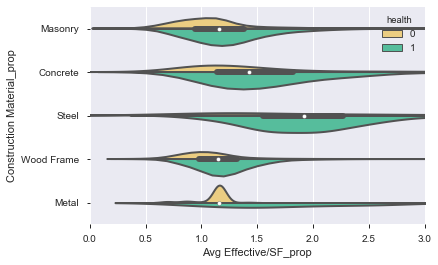

In [12]:
plt.figure()
plt.style.use('fast')
sns.violinplot(data = df, y =df['Construction Material_prop'],x=df['Avg Effective/SF_prop'],hue=df['health'],
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#fdd470','#45cea2'])
plt.xlim([0,3])
plt.show()

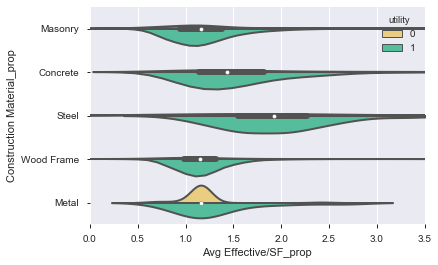

In [79]:
plt.figure()
plt.style.use('fast')
sns.violinplot(data = df, y =df['Construction Material_prop'],x=df['Avg Effective/SF_prop'],hue=df['utility'],
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#fdd470','#45cea2'])
plt.xlim([0,3.5])
plt.show()

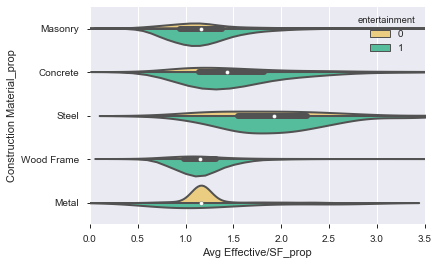

In [80]:
plt.figure()
plt.style.use('fast')
sns.violinplot(data = df, y =df['Construction Material_prop'],x=df['Avg Effective/SF_prop'],hue=df['entertainment'],
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#fdd470','#45cea2'])
plt.xlim([0,3.5])
plt.show()

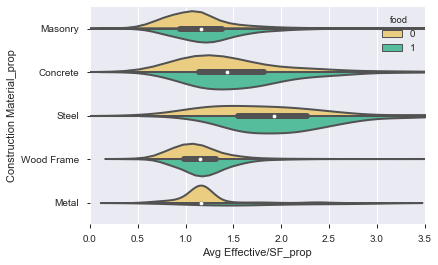

In [81]:
plt.figure()
plt.style.use('fast')
sns.violinplot(data = df, y =df['Construction Material_prop'],x=df['Avg Effective/SF_prop'],hue=df['food'],
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#fdd470','#45cea2'])
plt.xlim([0,3.5])
plt.show()

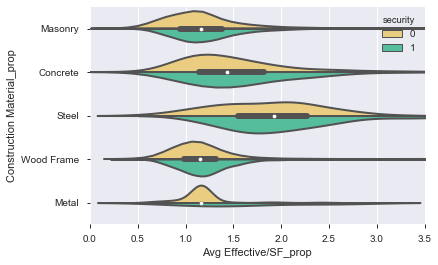

In [82]:
plt.figure()
plt.style.use('fast')
sns.violinplot(data = df, y =df['Construction Material_prop'],x=df['Avg Effective/SF_prop'],hue=df['security'],
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#fdd470','#45cea2'])
plt.xlim([0,3.5])
plt.show()

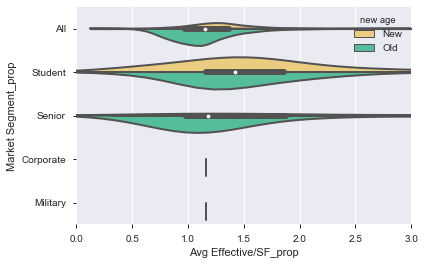

In [56]:
plt.figure()
plt.style.use('fast')
sns.violinplot(data = df, y =df['Market Segment_prop'],x=df['Avg Effective/SF_prop'],hue=df['new age'],
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#fdd470','#45cea2'])
plt.xlim([0,3])
plt.show()

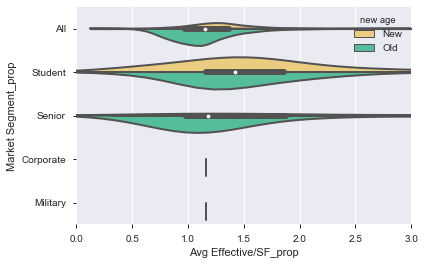

In [55]:
plt.figure()
plt.style.use('fast')
sns.violinplot(data = df, y =df['Market Segment_prop'],x=df['Avg Effective/SF_prop'],hue=df['new age'],
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#fdd470','#45cea2'])
plt.xlim([0,3])
plt.show()

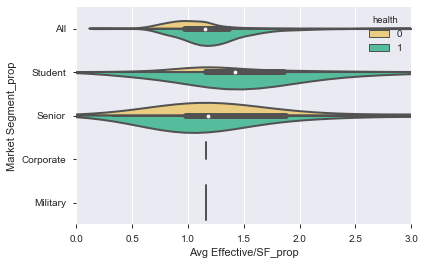

In [48]:
plt.figure()
plt.style.use('fast')
sns.violinplot(data = df, y =df['Market Segment_prop'],x=df['Avg Effective/SF_prop'],hue=df['health'],
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#fdd470','#45cea2'])
plt.xlim([0,3])
plt.show()

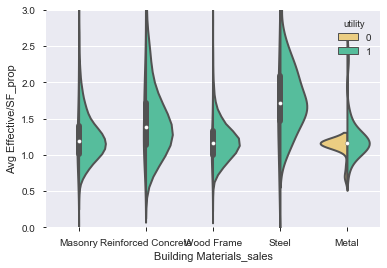

In [27]:
plt.figure()
plt.style.use('fast')
sns.violinplot(data = df, y =df['Avg Effective/SF_prop'],x=df['Building Materials_sales'],hue=df['utility'],
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#fdd470','#45cea2'])
plt.ylim([0,3])
plt.show()

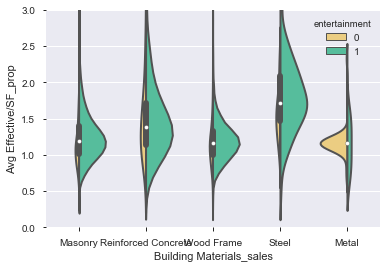

In [28]:
plt.figure()
plt.style.use('fast')
sns.violinplot(data = df, y =df['Avg Effective/SF_prop'],x=df['Building Materials_sales'],hue=df['entertainment'],
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#fdd470','#45cea2'])
plt.ylim([0,3])
plt.show()

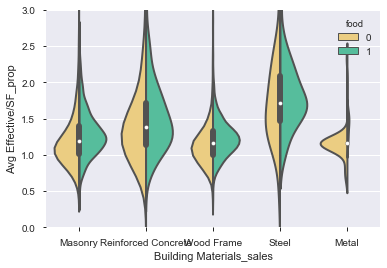

In [29]:
plt.figure()
plt.style.use('fast')
sns.violinplot(data = df, y =df['Avg Effective/SF_prop'],x=df['Building Materials_sales'],hue=df['food'],
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#fdd470','#45cea2'])
plt.ylim([0,3])
plt.show()

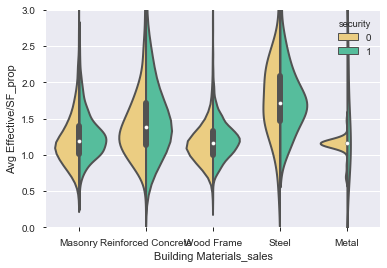

In [30]:
plt.figure()
plt.style.use('fast')
sns.violinplot(data = df, y =df['Avg Effective/SF_prop'],x=df['Building Materials_sales'],hue=df['security'],
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#fdd470','#45cea2'])
plt.ylim([0,3])
plt.show()

In [9]:
df1['Student'] = df1['Student'].apply(lambda x: "0-25%" if x < 25 else\
("25-50%" if (x>25) & (x<50) else ("50-75%" if (x>50) & (x<75) else "75-100%")))

df1['Working'] = df1['Working'].apply(lambda x: "0-25%" if x < 25 else\
("25-50%" if (x>25) & (x<50) else ("50-75%" if (x>50) & (x<75) else "75-100%")))

df1['Senior'] = df1['Senior'].apply(lambda x: "0-25%" if x < 25 else\
("25-50%" if (x>25) & (x<50) else ("50-75%" if (x>50) & (x<75) else "75-100%")))
df1.head()

,Unnamed: 0.1,PropID_prop,Property Address_prop,Property Name_prop,Star Rating_prop,Energy Star_prop,LEED Certified_prop,Building Status_prop,Secondary Type_prop,Market Name_prop,...,entertainment,food,security,Year Last Sale Date,Time Since Last Sale,Years Since Assessment,Years since Built,Student,Working,Senior
0,0,P1,6215 Johns Creek Cmn,The Reserve at Johns Creek Walk,4,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,1,1,1,2017.0,2,5.5,13,25-50%,50-75%,0-25%
1,1,P4,250 10th St NE,Post Parkside ATL,4,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,1,1,1,2008.0,11,5.0,35,25-50%,50-75%,0-25%
2,2,P5,100 10th St NW,100 Midtown,3,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,1,1,1,2014.0,5,6.0,51,25-50%,50-75%,0-25%
3,3,P6,150 NE 10th St,Juniper & 10th Highrise,2,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,1,0,0,NaN,3,5.0,35,25-50%,50-75%,0-25%
4,4,P7,48-80 12th St NE,Twelfth Street West Apartments,2,Non Energy Star,Non LEED Certified,Existing,Apartments,Atlanta,...,0,0,1,2012.0,7,5.0,60,25-50%,50-75%,0-25%


In [23]:
df2 = df1.groupby(['Student','Working','Senior','health','utility','entertainment','food','security'])['Avg Effective/SF_prop'].agg({'mean': 'mean', 'median': 'median'})
df2

mean  \
Student Working Senior health utility entertainment food security             
0-25%   0-25%   50-75% 0      0       0             0    0         1.745000   
                                      1             0    0         1.160000   
                              1       1             1    0         1.340000   
                       1      0       1             1    0         1.190000   
                              1       1             0    0         2.310000   
...                                                                     ...   
50-75%  50-75%  0-25%  1      0       1             0    1         0.550000   
                              1       1             0    0         1.712000   
                                                         1         1.050000   
                                                    1    0         1.140000   
                                                         1         1.516429   

                                                                   median  
Student Working Senior health utility entertainment food security          
0-25%   0-25%   50-75% 0      0       0             0    0          1.275  
                                      1             0    0          1.160  
                              1       1             1    0          1.340  
                       1      0       1             1    0          1.190  
                              1       1             0    0          2.310  
...                                                                   ...  
50-75%  50-75%  0-25%  1      0       1             0    1          0.550  
                              1       1             0    0          1.060  
                                                         1          1.050  
                                                    1    0          1.130  
                                                         1          1.510  

[214 rows x 2 columns]

In [24]:
idx = list(range(0,214))
df2['index_col'] = idx
df2.reset_index(inplace = True)
df2 = df2.drop(['index_col'], axis = 1)
df2.head()

,Student,Working,Senior,health,utility,entertainment,food,security,mean,median
0,0-25%,0-25%,50-75%,0,0,0,0,0,1.745,1.275
1,0-25%,0-25%,50-75%,0,0,1,0,0,1.160,1.160
2,0-25%,0-25%,50-75%,0,1,1,1,0,1.340,1.340
3,0-25%,0-25%,50-75%,1,0,1,1,0,1.190,1.190
4,0-25%,0-25%,50-75%,1,1,1,0,0,2.310,2.310


In [45]:
df3 = df2.groupby(['Student','Working','Senior','health'])['mean'].agg({'average': 'mean'})
df3.head()

average
Student Working Senior health          
0-25%   0-25%   50-75% 0       1.415000
                       1       2.480000
        25-50%  25-50% 0       1.416136
                       1       1.357224
                50-75% 0       2.409167

In [46]:
indx = list(range(0,29))
df3['index_col'] = indx
df3.reset_index(inplace = True)
df3 = df3.drop(['index_col'], axis = 1)
df3

,Student,Working,Senior,health,average
0,0-25%,0-25%,50-75%,0,1.415000
1,0-25%,0-25%,50-75%,1,2.480000
2,0-25%,25-50%,25-50%,0,1.416136
3,0-25%,25-50%,25-50%,1,1.357224
4,0-25%,25-50%,50-75%,0,2.409167
5,0-25%,25-50%,50-75%,1,1.458143
6,0-25%,50-75%,0-25%,0,1.623327
7,0-25%,50-75%,0-25%,1,1.892404
8,0-25%,50-75%,25-50%,0,1.402306
9,0-25%,50-75%,25-50%,1,1.734453


In [92]:
df4 = df3.loc[df3.health == 0]
df5 = df3.loc[df3.health == 1]
df4

,Student,Working,Senior,health,average
0,0-25%,0-25%,50-75%,0,1.415000
2,0-25%,25-50%,25-50%,0,1.416136
4,0-25%,25-50%,50-75%,0,2.409167
6,0-25%,50-75%,0-25%,0,1.623327
8,0-25%,50-75%,25-50%,0,1.402306
10,0-25%,75-100%,0-25%,0,1.400000
12,25-50%,25-50%,0-25%,0,0.905334
14,25-50%,25-50%,25-50%,0,1.344754
16,25-50%,25-50%,75-100%,0,0.720000
18,25-50%,50-75%,0-25%,0,1.136999


In [93]:
df4.reset_index(inplace = True)
df5.reset_index(inplace = True)

In [94]:
df4 = df4.drop(['index'], axis = 1)
df5 = df5.drop(['index'], axis = 1)
df4

,Student,Working,Senior,health,average
0,0-25%,0-25%,50-75%,0,1.415000
1,0-25%,25-50%,25-50%,0,1.416136
2,0-25%,25-50%,50-75%,0,2.409167
3,0-25%,50-75%,0-25%,0,1.623327
4,0-25%,50-75%,25-50%,0,1.402306
5,0-25%,75-100%,0-25%,0,1.400000
6,25-50%,25-50%,0-25%,0,0.905334
7,25-50%,25-50%,25-50%,0,1.344754
8,25-50%,25-50%,75-100%,0,0.720000
9,25-50%,50-75%,0-25%,0,1.136999


In [100]:
df4.rename(columns={"health": "combo", "average": "health = 0"},inplace = True)
df4['combo']=df4.apply(lambda x:'%s_%s_%s' % (x['Student'],x['Working'],x['Senior']),axis=1)
df4

,Student,Working,Senior,combo,health = 0
0,0-25%,0-25%,50-75%,0-25%_0-25%_50-75%,1.415000
1,0-25%,25-50%,25-50%,0-25%_25-50%_25-50%,1.416136
2,0-25%,25-50%,50-75%,0-25%_25-50%_50-75%,2.409167
3,0-25%,50-75%,0-25%,0-25%_50-75%_0-25%,1.623327
4,0-25%,50-75%,25-50%,0-25%_50-75%_25-50%,1.402306
5,0-25%,75-100%,0-25%,0-25%_75-100%_0-25%,1.400000
6,25-50%,25-50%,0-25%,25-50%_25-50%_0-25%,0.905334
7,25-50%,25-50%,25-50%,25-50%_25-50%_25-50%,1.344754
8,25-50%,25-50%,75-100%,25-50%_25-50%_75-100%,0.720000
9,25-50%,50-75%,0-25%,25-50%_50-75%_0-25%,1.136999


In [101]:
df5.rename(columns={"health": "combo", "average": "health = 1"},inplace = True)
df5['combo']=df5.apply(lambda x:'%s_%s_%s' % (x['Student'],x['Working'],x['Senior']),axis=1)
df5

,Student,Working,Senior,combo,health = 1
0,0-25%,0-25%,50-75%,0-25%_0-25%_50-75%,2.480000
1,0-25%,25-50%,25-50%,0-25%_25-50%_25-50%,1.357224
2,0-25%,25-50%,50-75%,0-25%_25-50%_50-75%,1.458143
3,0-25%,50-75%,0-25%,0-25%_50-75%_0-25%,1.892404
4,0-25%,50-75%,25-50%,0-25%_50-75%_25-50%,1.734453
5,0-25%,75-100%,0-25%,0-25%_75-100%_0-25%,1.780000
6,25-50%,25-50%,0-25%,25-50%_25-50%_0-25%,0.799502
7,25-50%,25-50%,25-50%,25-50%_25-50%_25-50%,1.381632
8,25-50%,25-50%,75-100%,25-50%_25-50%_75-100%,1.470000
9,25-50%,50-75%,0-25%,25-50%_50-75%_0-25%,1.376494


In [114]:
df6 = pd.merge(df4, df5, on = 'combo', how = 'outer')
df6 = df6.drop(['Student_y', 'Working_y', 'Senior_y'], axis = 1)
df6.rename(columns={"Student_x": "Student", "Working_x": "Working", "Senior_x": "Senior"},inplace = True)
df6['health = 1'].fillna(0, inplace=True)
df6['diff'] = df6['health = 1'] - df6['health = 0']
df6

,Student,Working,Senior,combo,health = 0,health = 1,diff
0,0-25%,0-25%,50-75%,0-25%_0-25%_50-75%,1.415000,2.480000,1.065000
1,0-25%,25-50%,25-50%,0-25%_25-50%_25-50%,1.416136,1.357224,-0.058913
2,0-25%,25-50%,50-75%,0-25%_25-50%_50-75%,2.409167,1.458143,-0.951024
3,0-25%,50-75%,0-25%,0-25%_50-75%_0-25%,1.623327,1.892404,0.269077
4,0-25%,50-75%,25-50%,0-25%_50-75%_25-50%,1.402306,1.734453,0.332147
5,0-25%,75-100%,0-25%,0-25%_75-100%_0-25%,1.400000,1.780000,0.380000
6,25-50%,25-50%,0-25%,25-50%_25-50%_0-25%,0.905334,0.799502,-0.105832
7,25-50%,25-50%,25-50%,25-50%_25-50%_25-50%,1.344754,1.381632,0.036878
8,25-50%,25-50%,75-100%,25-50%_25-50%_75-100%,0.720000,1.470000,0.750000
9,25-50%,50-75%,0-25%,25-50%_50-75%_0-25%,1.136999,1.376494,0.239496


ValueError: Unrecognized marker style '-'

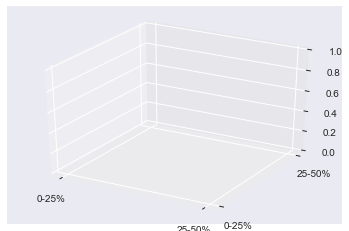

In [136]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = df6['Student']
ys = df6['Working']
zs = df6['Senior']
ax.scatter(xs, ys, zs, marker='-')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline

In [129]:
fig = plt.figure()
ax = plt.axes(projection='3d')
zline = df6['Senior']
xline = df6['Student']
yline = df6['Working']
ax.plot3D(xline, yline, zline, 'gray')
plt.show()

ValueError: could not convert string to float: '0-25%'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000021D3F974798> (for post_execute):


TypeError: can't multiply sequence by non-int of type 'float'

TypeError: can't multiply sequence by non-int of type 'float'

<Figure size 432x288 with 1 Axes>

In [93]:
# df = df.loc[df['Building Status'].isin(['Existing', 'Under Renovation'])]
# df['Energy Star'] = df['Energy Star'].notnull().astype('int')
# df['LEED Certified'] = df['LEED Certified'].notnull().astype('int')